In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [2]:
df = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
# Fazendo um cópia do dataframe
df_raw = df.copy()

In [4]:
# Verificar o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Corrigindo a coluna TotalCharges e convertendo em FLOAT
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','-1').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# Preparar os dados


In [7]:
# Transformando dados categorias em números
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int8
dtypes: float64(2), int16(1), int64(2), int8(16)
memory usage: 34

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [10]:

# Importandoa função
from sklearn.model_selection import train_test_split

In [11]:
# Separação do dataframe em treino e teste
train, test = train_test_split(df, test_size=0.2,random_state=42)

In [12]:
# Separando o dataframe de treino em treino e validação
train, valid = train_test_split(train,test_size=0.2,random_state=42)

In [13]:
train.shape, valid.shape, test.shape

((4507, 21), (1127, 21), (1409, 21))

In [14]:
# Selecionar as colunas para treinamento
feats = [c for c in df.columns if c not in['customerID','Churn']]

In [15]:
# Importar o RandomForest
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Instanciar o RandomForest
rf = RandomForestClassifier(n_estimators=200, min_samples_split=5,max_depth=4,random_state=42)

In [17]:
# Treinamento do modelo
rf.fit(train[feats],train['Churn'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
preds = rf.predict(valid[feats])

In [19]:
# Avaliando o desempenho do modelo
from sklearn.metrics import accuracy_score

accuracy_score(valid['Churn'], preds)

0.7808340727595386

In [20]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [21]:
(valid['Churn']== 0).mean()

0.7293700088731144

In [22]:
test['Churn'].value_counts(normalize=True)

0    0.735273
1    0.264727
Name: Churn, dtype: float64

In [23]:
# Rodar o modelo para prever o Churn dos dados de teste
accuracy_score(test['Churn'], rf.predict(test[feats]))

0.794889992902768

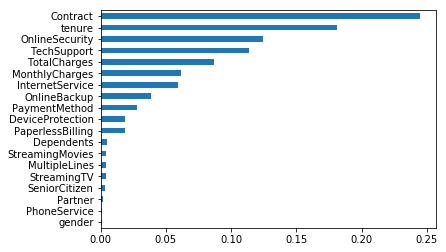

In [24]:
# Analisando a importância das características
pd.Series(rf.feature_importances_,index=feats).sort_values().plot.barh()

In [25]:
# Matriz de confusao
from sklearn.metrics import confusion_matrix
confusion_matrix(test['Churn'],rf.predict(test[feats]))

array([[963,  73],
       [216, 157]])

In [26]:
pd.DataFrame(confusion_matrix(test['Churn'],rf.predict(test[feats])))

,0,1
0,963,73
1,216,157


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


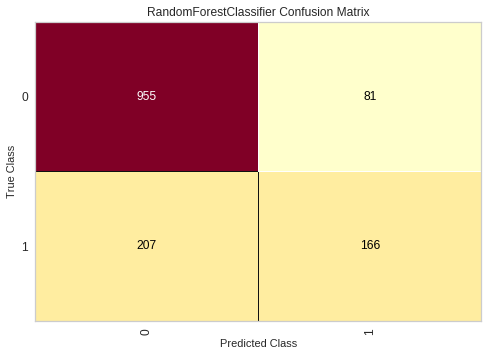

In [27]:
from yellowbrick.classifier import ConfusionMatrix
viz = ConfusionMatrix(RandomForestClassifier())
viz.fit(train[feats],train['Churn'])
viz.score(test[feats],test['Churn'])
viz.poof()